#### Ejercicio 1: Preparar el ambiente de trabajo
- Importe los módulos clásicos del trabajo en ciencia de datos.
- El archivo tiene el nombre compresive_strength_concrete.csv. Importe y genere estadísticas descriptivas.
- En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería pyGAM.



In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../../utils/')
from calidad_datos import calidad_datos as cal

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 100 # resolución gráficos

In [6]:
df = pd.read_csv('compresive_strength_concrete.csv')
df2=df
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Ejercicio 2: Descripción
- El vector objetivo tiene el nombre de <code>Concrete compressive strength(MPa, megapascals)</code>
- Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc.
- Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decide si es necesario normalizarlos/escalarlos.


In [7]:
df.columns = ['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','Concrete compressive strength']
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
# Tipos de datos (Con nombres de columnas cambiados)
cal(df)['tipo']

Age                                int64
Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Concrete compressive strength    float64
Name: tipo, dtype: object

In [9]:
# Analisis de tipos de datos
#df.describe().round(4)
cal(df)

,tipo,nulos,porc_nulos,ceros,porc_ceros,count,mean,std,min,25%,50%,75%,max,limit_inf,limit_sup,outliers
Age,int64,0,0.0,0,0.000000,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0,-49.092731,140.417003,59
Cement,float64,0,0.0,0,0.000000,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0,124.408317,437.927411,111
Blast Furnace Slag,float64,0,0.0,471,0.457282,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4,-55.523187,203.314838,88
Fly Ash,float64,0,0.0,566,0.549515,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1,-41.807157,150.183856,83
Water,float64,0,0.0,0,0.000000,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0,149.535954,213.598609,138
Superplasticizer,float64,0,0.0,379,0.367961,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2,-2.756102,15.165422,61
Coarse Aggregate,float64,0,0.0,0,0.000000,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0,856.288001,1089.549863,176
Fine Aggregate,float64,0,0.0,0,0.000000,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6,653.316515,893.844456,147
Concrete compressive strength,float64,0,0.0,0,0.000000,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6,10.759348,60.876574,138


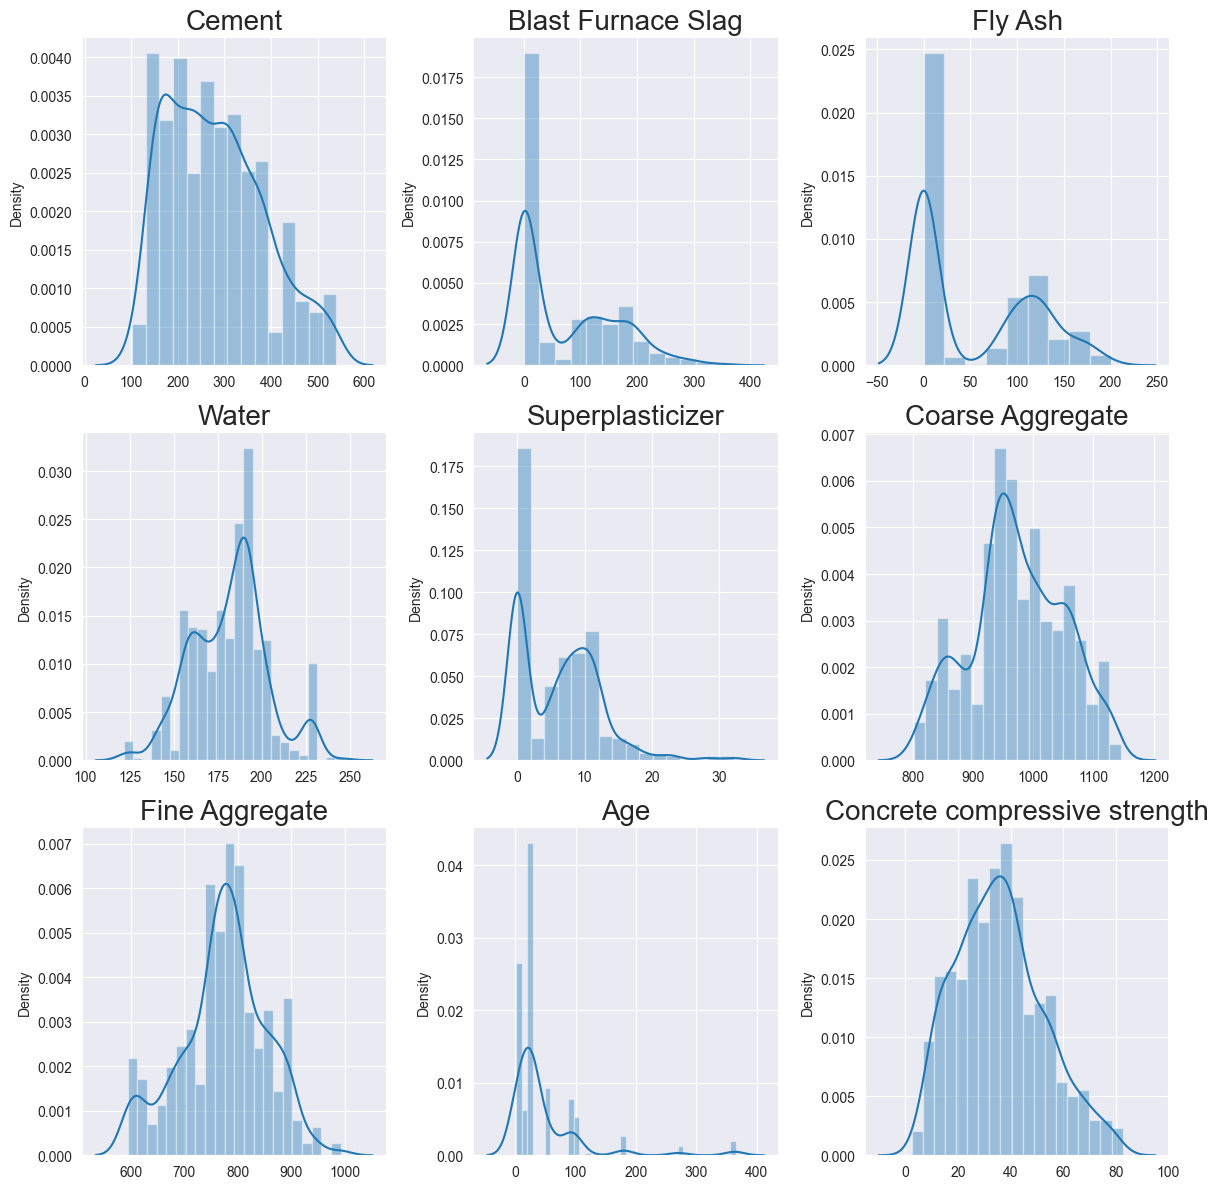

In [10]:
#Analisis por densidad:
cols = 3
rows = int(df.shape[1] / cols)
size_fact = 4
plt.figure(figsize=(rows*size_fact, cols*size_fact))
for i, col in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)
    sns.distplot(df[col])
    plt.title(col, fontsize=20)
    plt.xlabel('')
    plt.tight_layout()

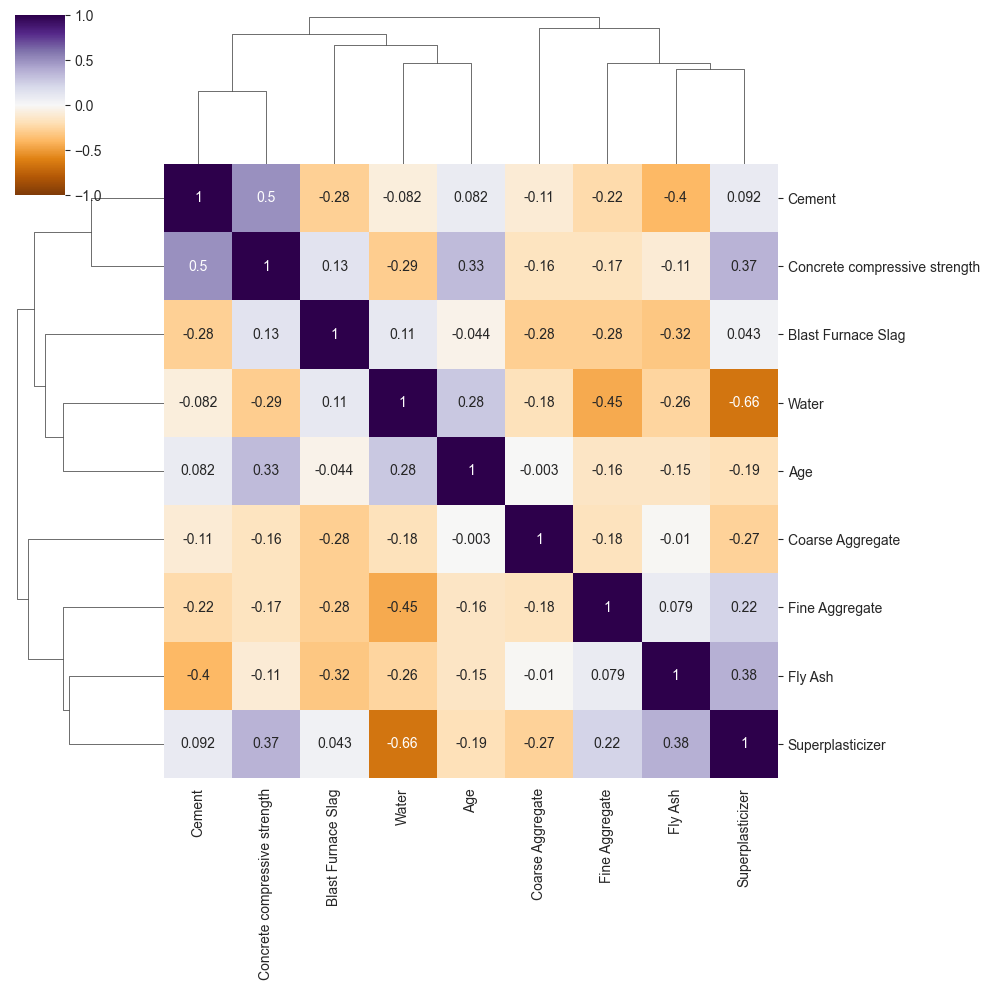

In [28]:
#Analisis de correlaciones 
sns.clustermap(df.corr(),cbar_kws={"shrink":.5}, cmap="PuOr", vmin=-1, vmax=1, annot=True)

In [32]:
# Analisis de factores latentes
import factor_analyzer as fact
fact.calculate_bartlett_sphericity(df)
# el primero debe ser menor a 1.95?  para la hipotesis nula y el segundo el P valor 

(5128.791812638182, 0.0)

In [35]:
print (df.columns)
fact.calculate_kmo(df)
# son valores todos malos para KMO XD

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')


(array([0.14415966, 0.09925281, 0.14438962, 0.25876093, 0.6661951 ,
        0.07627983, 0.12454038, 0.35073922, 0.5086709 ]),
 0.1938363097158984)

##### Analisis inicial:
- Las variables son numéricas menos <code>Age</code> (variable categórica).
- <code>Blast Furnace Slag</code> y <code>Fly Ash</code> tienen una gran cantidad ceros.
- Hay una fuerte correlación positiva entre <code>cement</code>(Cantidad de Cemento) y la V.O. (<code>Concrete compressive strength </code>/ fortaleza del concreto).
- Se aplicará <code>normalización</code> porque algunas variables tienen valores muy pequeños (como Fly Ash) v/s Coarse Aggregate o Fine Aggregate
- Como <code>Concrete compressive strength </code> es la V.O. y es una variable (vector) numérico(no categorico) se usará un <code>modelo lineal</code> para su predicción.
***

#### Ejercicio 3: Modelos
- En base al vector objetivo, decida el mejor modelo e importe con <code>pygam</code>. Condicional a esto, importe las métricas de desempeño asociadas.
- Genere conjuntos de entrenamiento y validación.
- Genere un primer modelo sin implementar la función <code>gridsearch</code>. Reporte el hiper parámetro <code>lam</code> así como las métricas de desempeño asociadas.
- Genere un segundo modelo implementando <code>gridsearch</code> en <code>lambda</code> con un logspace entre -3 y 3. Comente sobre el mejor hiper parámetro y sus métricas de desempeño.

In [21]:
#Importaciones solicitadas
from pygam import LinearGAM
from pygam import s
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

#Se separa la data de entrenamiento y pruebas de todas las columas menos la ultima (df.iloc[:,:-1])
X_train_pre, X_test_pre, y_train, y_test = train_test_split(df.iloc[:,:-1], df['Concrete compressive strength'], test_size = 0.25, shuffle=True, random_state = 42)

#Se escala la data para mantener dimencionalidad 
scaler = StandardScaler().fit(X_train_pre)
#Se prepara la data de entranamiento y testeo para los modelos
X_train = pd.DataFrame(scaler.transform(X_train_pre), columns = X_train_pre.columns)
X_test = pd.DataFrame(scaler.transform(X_test_pre), columns = X_test_pre.columns)
X_train


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.101633,-0.844238,1.749466,-0.245876,-0.271324,1.078768,0.089138,-0.279194
1,-0.658951,0.279818,-0.434792,-0.001334,0.093766,1.172865,0.155858,-0.509504
2,0.447290,-0.844238,-0.820342,0.483047,-1.018099,-0.541238,0.861362,-0.624659
3,1.913616,-0.546323,1.115276,1.329537,-0.370894,-1.166860,-0.912900,-0.279194
4,-0.915094,0.577733,-0.820342,0.186775,-1.018099,1.394122,-0.106080,-0.279194
...,...,...,...,...,...,...,...,...
767,0.013888,1.457728,-0.820342,-1.741342,0.840541,0.392109,0.380730,-0.690462
768,-0.352693,-0.844238,1.148323,-1.807180,0.973301,1.437356,0.346134,-0.509504
769,-0.877044,-0.844238,1.149896,-0.711445,0.624806,1.338172,0.321423,0.905260
770,1.765127,0.517004,-0.820342,-0.029550,0.458856,-1.547065,0.106436,-0.279194


In [22]:
#Se resetean los indices
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_train

0      21.54
1      17.84
2      23.40
3      55.55
4      17.60
       ...  
767    24.40
768    42.22
769    33.56
770    68.30
771    38.46
Name: Concrete compressive strength, Length: 772, dtype: float64

#### Modelo 1

In [26]:
#Con LinearGAM
gam = LinearGAM(s(0) + s(1) + s(2)+ s(3)+ s(4)+ s(5)+ s(6)+ s(7), fit_intercept=True)
gam.fit(X_train.values, y_train.values)


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + intercept,
   tol=0.0001, verbose=False)

In [24]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     80.9722
Link Function:                     IdentityLink Log Likelihood:                                 -3236.1714
Number of Samples:                          772 AIC:                                             6636.2872
                                                AICc:                                            6656.0293
                                                GCV:                                               31.8983
                                                Scale:                                             25.9388
                                                Pseudo R-Squared:                                   0.9175
Feature Function                  Lam

In [25]:
def report_gam_metrics(model, X_test, y_test):
    print('Test R^2: {0}'.format(r2_score(y_test, model.predict(X_test)).round(3)))
    print('Test RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test))).round(3)))
    print('Test Median Absolute Error: {0}'.format(median_absolute_error(y_test, model.predict(X_test)).round(3)))

report_gam_metrics(gam, X_test, y_test)

Test R^2: 0.884
Test RMSE: 5.61
Test Median Absolute Error: 3.943


##### Analisis del modelo 1:
- El modelo explica un 88.4% de la V.O.
- Hay un bajo error del modelo indicado con un RMSE de 5.61 y MAE de 3.943
- El hiperparámetro lambda es de 0.6
- Todos los atributos utilizados son significativos, ya que tienen un valor p < de 0.05
***

#### Modelo 2 con gridsearch

In [27]:
#Utilizando -3 3
lam = np.logspace(-3, 3, 3)
lams = [lam] * 8
gam_g = LinearGAM(s(0)+ s(1)+ s(2)+ s(3)+ s(4)+ s(5)+ s(6)+ s(7), fit_intercept=True)
gam_g.gridsearch(X_train.values, y_train.values, lam=lams)

  0% (0 of 6561) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (1 of 6561) |                       | Elapsed Time: 0:00:00 ETA:   0:38:32
  0% (2 of 6561) |                       | Elapsed Time: 0:00:00 ETA:   0:37:10
  0% (3 of 6561) |                       | Elapsed Time: 0:00:01 ETA:   0:37:16
  0% (4 of 6561) |                       | Elapsed Time: 0:00:01 ETA:   0:36:59
  0% (5 of 6561) |                       | Elapsed Time: 0:00:01 ETA:   0:36:15
  0% (6 of 6561) |                       | Elapsed Time: 0:00:01 ETA:   0:35:45
  0% (7 of 6561) |                       | Elapsed Time: 0:00:02 ETA:   0:36:27
  0% (8 of 6561) |                       | Elapsed Time: 0:00:02 ETA:   0:35:51
  0% (9 of 6561) |                       | Elapsed Time: 0:00:02 ETA:   0:35:29
  0% (10 of 6561) |                      | Elapsed Time: 0:00:03 ETA:   0:35:13
  0% (11 of 6561) |                      | Elapsed Time: 0:00:03 ETA:   0:35:38
  0% (12 of 6561) |                     

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + intercept,
   tol=0.0001, verbose=False)

In [29]:
gam_g.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     92.5784
Link Function:                     IdentityLink Log Likelihood:                                 -3177.2768
Number of Samples:                          772 AIC:                                             6541.7105
                                                AICc:                                            6567.8405
                                                GCV:                                               30.5148
                                                Scale:                                             24.0077
                                                Pseudo R-Squared:                                   0.9249
Feature Function                  Lam

In [30]:
report_gam_metrics(gam_g, X_test, y_test)

Test R^2: 0.886
Test RMSE: 5.56
Test Median Absolute Error: 3.671


#### Gráficos del modelo 2

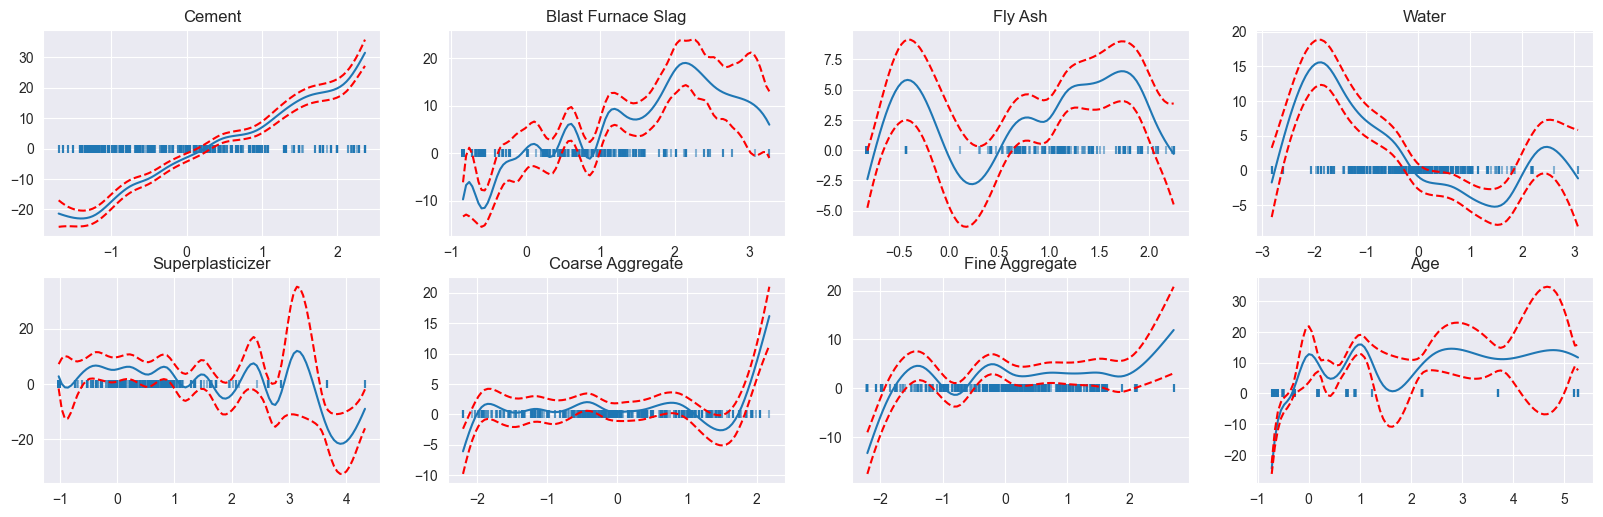

In [31]:
def partial_dependence(model):
    fig, axs = plt.subplots(2,4, figsize = (20,6))
    titles = X_train.columns
    for i, ax in enumerate(axs.flatten()):
        XX = model.generate_X_grid(term=i)
        ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX))
        ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
        ax.scatter(X_train[titles[i]], [0] * len(X_train[titles[i]]), marker = '|', alpha = .5) 
        ax.set_title(titles[i])
partial_dependence(model=gam_g)

Relación Positiva (directa)
- Con más cantidad de <code>Cement</code> hay una mejor <code>Concrete compressive strength</code>.
- Con más <code>Age</code> hay una mejor <code>Concrete compressive strength</code>.

Relación Positiva condicinal
- <code>Coarse Aggregate</code> se mantiene neutro y sobre cierto punto afecta positivamente a la V.O.

Relación Negativa (inversa)
- <code>Fly Ash y Water</code> con valores altos afecta a la V.O. de forma negativa, pero a bajos niveles interactua de forma positiva con la V.O. (<code>Concrete compressive strength</code>.)

Relación neutra o muy baja
- <code>Superplasticize</code> tiende afectar negativamente con valores altos de la variable y Fine Aggregate</code> tiende afectar positivamente